Dynamics

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


def dynamics(t, y, E_L, tau_s, tau_s_w, I_e, b_s_w, S_s_i, C_s, V_d_i, f, g_s):
    V, w = y[0], y[1]

    dV_dt = (E_L - V)/tau_s + ( g_s*f(V_d_i) + I_e(t) + w)/C_s 
    dw_dt = - w/tau_s_w + b_s_w*S_s_i
    
    return np.array([dV_dt, dw_dt])


def dynamics_dendritic(t, y, E_L, tau_d, g_d, f, c_d, K, t_hat, I_d, C_d, tau_d_w, a_d_w):
  
    V_d, w_d = y[0], y[1]

    dV_d_dt = (
        -(V_d - E_L) / tau_d
        + (g_d * f(V_d) + c_d * K(t - t_hat) + I_d(t) + w_d) / C_d
    )

    dw_d_dt = (-w_d  + a_d_w * (V_d - E_L))/ tau_d_w

    return np.array([dV_d_dt, dw_d_dt])


def dynamics_PV(t, y, E_L, tau_PV, C_PV, I_PV):

    V_PV = y
    dV_dt = (E_L - V_PV)/tau_PV + I_PV(t)/C_PV

    return dV_dt


def dynamics_SOM(t, y, E_L, tau_SOM, tau_w_SOM, C_SOM, I_SOM, b_w_SOM, S_SOM):
    
    V_SOM, w_SOM = y[0], y[1]
    dV_dt = (E_L - V_SOM)/tau_SOM + (I_SOM(t) + w_SOM)/C_SOM
    dw_dt = -w_SOM/tau_w_SOM + b_w_SOM*S_SOM

    return np.array([dV_dt, dw_dt])

    
def f_function(x, E_d, D_m):
    return 1/(1 + np.exp( -(x - E_d)/D_m))


def runge_kutta(t, y, g, dt):

    k1 = dt * g(t, y)
    k2 = dt * g(t + dt, y + k1)

    y_new = y + 0.5 * (k1 + k2)
    t_new = t + dt


    # print('yold:', y, 'ynew', y_new)

    return np.array(y_new), t_new



Parameters

In [119]:
# Soma parameters
tau_s = 16.0
C_s = 370.0
g_s = 1300.0 # gating variable for somatic 
b_s_w = -200.0 # constant to multiply the somatic spikes
tau_s_w = 100
E_L = -70.0
V_th = -50.0 # threshold

# f(x) parameters
E_d = -38.0
D_m = 6.0

# dendritic parameters 
tau_d = 7
C_d = 170
g_d = 1200
c_d = 2600
tau_d_w = 30.0
a_d_w = -13
E_L = E_L

# PV parameters
tau_PV = 10.0
C_PV = 100.0

# SOM parameters
tau_SOM = 20.0
C_SOM = 100.0
b_w_SOM = -150.0
tau_w_SOM = 100.0


I_e = lambda t: 500.0 if 100.0 < t < 800.0 else 0
I_d = lambda t: 350.0 if 200.0 < t < 400.0 else 0
f = lambda x: f_function(x, E_d, D_m)
K = lambda x: 1.0 if 0.5 < x < 2 else 0 # double check this



[-65.00037815  99.90005   ] [-65.00484955  99.45      ]
[-65.0007841  99.8001999] [-65.00995955  98.90204348]
[-65.0012178  99.7004496] [-65.01532541  98.35613492]
[-65.00167922  99.600799  ] [-65.02094257  97.81227857]
[-65.0021683  99.501248 ] [-65.02680657  97.27047848]
[-65.002685   99.4017965] [-65.03291296  96.73073851]
[-65.00322926  99.30244441] [-65.03925739  96.19306227]
[-65.00380103  99.20319162] [-65.04583552  95.65745322]
[-65.00440024  99.10403803] [-65.0526431   95.12391458]
[-65.00502685  99.00498354] [-65.0596759  94.5924494]
[-65.00568078  98.90602806] [-65.06692977  94.06306052]
[-65.00636196  98.80717148] [-65.0744006   93.53575061]
[-65.00707034  98.70841372] [-65.08208433  93.01052214]
[-65.00780583  98.60975466] [-65.08997694  92.48737738]
[-65.00856837  98.51119421] [-65.09807448  91.96631846]
[-65.00935788  98.41273227] [-65.10637305  91.44734729]
[-65.01017427  98.31436874] [-65.11486877  90.93046563]
[-65.01101747  98.21610353] [-65.12355784  90.41567506]
[-

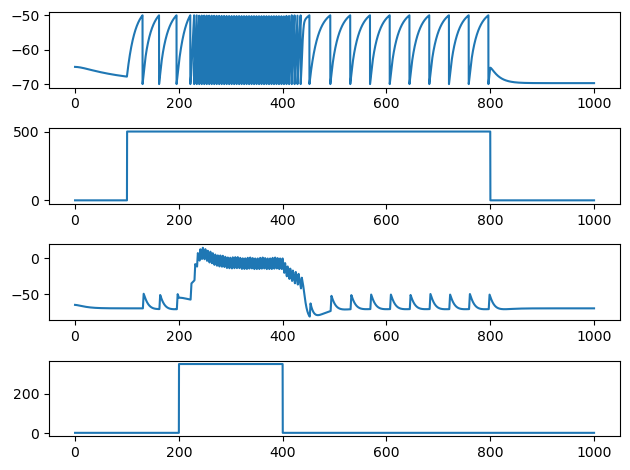

In [120]:

#initialize values:

V = -65.0
w = 100.0

V_d = -65.0
w_d = 100.0

dt = 0.1

t_values = np.arange(0, 1000, 0.1)
y_values = np.zeros((2, len(t_values) + 1))
y_dendrite_values = np.zeros((2, len(t_values) + 1))
y_values[:, 0] = np.array([V, w])
y_dendrite_values[:, 0] = np.array([V_d, w_d])


for i, t in enumerate(t_values):

    y = y_values[:, i]
    y_dendrite = y_dendrite_values[:, i]

    dyn_use_dend = lambda t, y: dynamics_dendritic(t, y_dendrite, E_L, tau_d, g_d, f, c_d, K, t_hat, I_d, C_d, tau_d_w, a_d_w)
    y_new_dend, t = runge_kutta(t, y_dendrite, dyn_use_dend, dt)

    V_d = y_new_dend[0]

    dyn_use = lambda t, y: dynamics(t, y, E_L, tau_s, tau_s_w, I_e, b_s_w, S_s_i, C_s, V_d, f, g_s)
    S_s_i = 0.0

    y_new, t = runge_kutta(t, y, dyn_use, dt)

    if y_new[0] > V_th:
        ### TODO: SOMEHOW NEED TO IMPLEMENT ABSOLUTE REFRACTORY PERIOD OF 3ms
        y_new[0] = E_L
         #y_new_dend[0] = E_L
        S_s_i = 1.0
        t_hat = t

    print(y_new, y_new_dend)

    y_values[:, i+1] = y_new
    y_dendrite_values[:, i+1] = y_new_dend


V = y_values[0,:]
V_d = y_dendrite_values[0,:]

fig, ax = plt.subplots(4, 1)

I_arr = np.array([I_e(t) for t in t_values])
I_d_arr = np.array([I_d(t) for t in t_values])

ax[0].plot(t_values, V[:-1])
ax[1].plot(t_values, I_arr)
ax[2].plot(t_values, V_d[:-1])
ax[3].plot(t_values, I_d_arr)
plt.tight_layout()
plt.show()
